# **Approche supervisée**

## 1. Collecte de données

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [166]:
data = pd.read_csv("breast.data")

## 2. Pré-Exploration EDA

In [167]:
data.head()

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [168]:
data.shape

(699, 11)

In [169]:
data.info()

# On remarque que la colonne "Bare_Nuclei" est de type object, inspectons-là.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_number                    699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [170]:
uniques_values_data = data.apply(lambda x: pd.unique(x))

print(uniques_values_data)

id_number                      [1000025, 1002945, 1015425, 1016277, 1017023, ...
Clump_Thickness                                  [5, 3, 6, 4, 8, 1, 2, 7, 10, 9]
Uniformity_Cell_Size                             [1, 4, 8, 10, 2, 3, 7, 5, 6, 9]
Uniformity_Cell_Shape                            [1, 4, 8, 10, 2, 3, 5, 6, 7, 9]
Marginal_Adhesion                                [1, 5, 3, 8, 10, 4, 6, 2, 9, 7]
Single_Epithelial_Cell_Size                      [2, 7, 3, 1, 6, 4, 5, 8, 10, 9]
Bare_Nuclei                                   [1, 10, 2, 4, 3, 9, 7, ?, 5, 8, 6]
Bland_Chromatin                                  [3, 9, 1, 2, 4, 5, 7, 8, 6, 10]
Normal_Nucleoli                                  [1, 2, 7, 4, 5, 3, 10, 6, 9, 8]
Mitoses                                             [1, 5, 4, 2, 3, 7, 10, 8, 6]
Class                                                                     [2, 4]
dtype: object


In [171]:
print("Valeurs de classes disponibles:", data["Class"].unique())
print("Occurence des classes disponibles:\n", data["Class"].value_counts())

# Il existe donc deux classes pour la cible, soit 2 ou 4

Valeurs de classes disponibles: [2 4]
Occurence des classes disponibles:
 2    458
4    241
Name: Class, dtype: int64


In [172]:
print(data["Bare_Nuclei"].unique())

# On remarque une valeur "?" dans le descripteur "Bare_Nuclei"

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


## 3. Pré-traitement des données

In [173]:
# On considère la valeur "?" comme une valeur non disponible
data["Bare_Nuclei"] = data["Bare_Nuclei"].replace("?", pd.NA)

In [174]:
# On supprime les enregistrements contenant des valeurs non disponible
data = data.dropna()

In [175]:
# On converti le descripteur "Bare_Nuclei" en numérique
data["Bare_Nuclei"] = pd.to_numeric(data["Bare_Nuclei"])

## 4. Post-Exploration EDA

In [176]:
# Nombre de features dans notre dataframe
nb_features = data.shape[1]
print("Nombre de features:", nb_features)

# Nombre d'enregistrement
nb_enregistrements = data.shape[0]
print("Nombre d'enregistrements:", nb_enregistrements)

# Nombre de valeurs manquantes
nb_total_valeurs_manquantes = data.isnull().sum().sum()
print("Valeurs manquantes:", nb_total_valeurs_manquantes)

# Nombre total de cellules
nb_total_cellules = data.size

# Pourcentage de valeurs manquantes par rapport au nombre total de
# cellules
pourcentage_valeurs_manquantes = (nb_total_valeurs_manquantes / nb_total_cellules) * 100
print("Valeurs manquantes (%):", round(pourcentage_valeurs_manquantes,2))

# Variables qualitatives
features_qualitatives = data.select_dtypes(exclude="number").columns
nb_features_qualitatives = len(features_qualitatives)
print("Features qualitatives:", nb_features_qualitatives)

# Variables quantitatives (numériques)
features_quantitatives = data.select_dtypes(include="number").columns
nb_features_quantitatives = len(features_quantitatives)
print("Features quantitatives:", nb_features_quantitatives)

Nombre de features: 11
Nombre d'enregistrements: 683
Valeurs manquantes: 0
Valeurs manquantes (%): 0.0
Features qualitatives: 0
Features quantitatives: 11


Il n'y a plus de valeurs manquantes dans nos données. De plus, on a que des descripteurs quantitatives.
On peut en conclure que nos données sont correctement nettoyées et prêtent pour l'étape de selection des descripteurs et cible.

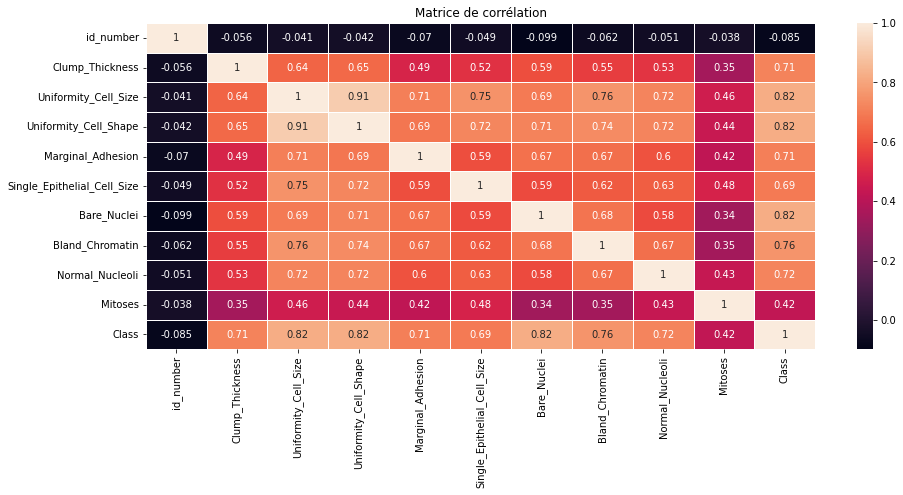

In [177]:
matrice_correlation = data.corr()

plt.figure(figsize=(15,6))
sns.heatmap(matrice_correlation, annot=True, linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [178]:
correlation = data.corr()['Class'].sort_values(ascending = False)
correlation

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.821891
Uniformity_Cell_Size           0.820801
Bland_Chromatin                0.758228
Normal_Nucleoli                0.718677
Clump_Thickness                0.714790
Marginal_Adhesion              0.706294
Single_Epithelial_Cell_Size    0.690958
Mitoses                        0.423448
id_number                     -0.084701
Name: Class, dtype: float64

Interpretation de la matrice de corrélation:
La variable "id_number" a une corrélation très faible avec la variable "Class". Cela signifie que cette variable n'a pas une influence significative sur la cible
Toutes les autres variables (descripteurs) ont des coefficients de corrélation positifs relativement élevés avec la cible. Cela signifie qu'elles sont positivement corrélées avec la cible.

## 5. Feature Engineering

In [179]:
# Prédicteurs: Tout les descripteurs sauf "Class" et "id_number"
X = data.drop(columns=["Class","id_number"])

# Cible: La variable "Class"
y = data["Class"]

In [180]:
X.head()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [181]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [182]:
# On divise nos données en données d'entrainement et de test. (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)

In [183]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(546, 9) (137, 9) (546,) (137,)


## 6. Développement du modèle

In [184]:
# Selection du modèle k-nearest neighbor
knn = neighbors.KNeighborsClassifier()

# Apprentissage du modèle
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [185]:
dtc = DecisionTreeClassifier(criterion="entropy", random_state=44, max_depth=3, min_samples_leaf=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=44)

## 7. Test et évaluation du modèle

### 7.1 KNN

In [188]:
# Prédiction avec le modèle obtenu
y_pred_knn = knn.predict(X_train)
print(y_pred_knn.shape)

# Évaluez les performances du modèle KNN
acc_knn = accuracy_score(y_train, y_pred_knn)
conf_knn = confusion_matrix(y_train, y_pred_knn)
clf_report_knn = classification_report(y_train, y_pred_knn)

# Affichez les résultats
print("Accuracy (KNN):", acc_knn)
print("\nMatrice de confusion (KNN):\n", conf_knn)
print("\nRapport de classification (KNN):\n", clf_report_knn)

(546,)
Accuracy (KNN): 0.9798534798534798

Matrice de confusion (KNN):
 [[351   7]
 [  4 184]]

Rapport de classification (KNN):
               precision    recall  f1-score   support

           2       0.99      0.98      0.98       358
           4       0.96      0.98      0.97       188

    accuracy                           0.98       546
   macro avg       0.98      0.98      0.98       546
weighted avg       0.98      0.98      0.98       546



In [189]:
# On prédit les y_test
y_pred_knn = knn.predict(X_test)
print(y_pred_knn.shape)

# Évaluez les performances du modèle KNN
acc_knn = accuracy_score(y_test, y_pred_knn)
conf_knn = confusion_matrix(y_test, y_pred_knn)
clf_report_knn = classification_report(y_test, y_pred_knn)

# Affichez les résultats
print("Accuracy (KNN):", acc_knn)
print("\nMatrice de confusion (KNN):\n", conf_knn)
print("\nRapport de classification (KNN):\n", clf_report_knn)

(137,)
Accuracy (KNN): 0.9781021897810219

Matrice de confusion (KNN):
 [[84  2]
 [ 1 50]]

Rapport de classification (KNN):
               precision    recall  f1-score   support

           2       0.99      0.98      0.98        86
           4       0.96      0.98      0.97        51

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



Notre modèle a une exactitude de 97.8% pour la phase de test, ce qui est une bonne exactitude.

In [190]:
# On prédit la cible pour un enregistrement Out-Of-Sample
ech = {
    "Clump_Thickness": 4,
    "Uniformity_Cell_Size": 2,
    "Uniformity_Cell_Shape": 1,
    "Marginal_Adhesion": 1,
    "Single_Epithelial_Cell_Size": 1,
    "Bare_Nuclei": 2,
    "Bland_Chromatin": 3,
    "Normal_Nucleoli": 2,
    "Mitoses": 1
}

ech_df = pd.DataFrame(ech, index=[0])

y_pred_knn = knn.predict(ech_df)
print(y_pred_knn.shape)
print(y_pred_knn)

(1,)
[2]


Selon notre modèle, pour cet échantillon on prédit la classe 2.

### 7.2 Decision Tree Classifier

In [192]:
# Prédiction avec le modèle obtenu
y_pred_dtc = dtc.predict(X_train)
print(y_pred_dtc.shape)

# Évaluez les performances du modèle KNN
acc_dtc = accuracy_score(y_train, y_pred_dtc)
conf_dtc = confusion_matrix(y_train, y_pred_dtc)
clf_report_dtc = classification_report(y_train, y_pred_dtc)

# Affichez les résultats
print("Accuracy (KNN):", acc_dtc)
print("\nMatrice de confusion (KNN):\n", conf_dtc)
print("\nRapport de classification (KNN):\n", clf_report_dtc)

(546,)
Accuracy (KNN): 0.967032967032967

Matrice de confusion (KNN):
 [[344  14]
 [  4 184]]

Rapport de classification (KNN):
               precision    recall  f1-score   support

           2       0.99      0.96      0.97       358
           4       0.93      0.98      0.95       188

    accuracy                           0.97       546
   macro avg       0.96      0.97      0.96       546
weighted avg       0.97      0.97      0.97       546



In [193]:
# On prédit les y_test
y_pred_dtc = dtc.predict(X_test)
print(y_pred_dtc.shape)

# Évaluez les performances du modèle KNN
acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf_dtc = confusion_matrix(y_test, y_pred_dtc)
clf_report_dtc = classification_report(y_test, y_pred_dtc)

# Affichez les résultats
print("Accuracy (KNN):", acc_dtc)
print("\nMatrice de confusion (KNN):\n", conf_dtc)
print("\nRapport de classification (KNN):\n", clf_report_dtc)

(137,)
Accuracy (KNN): 0.9197080291970803

Matrice de confusion (KNN):
 [[75 11]
 [ 0 51]]

Rapport de classification (KNN):
               precision    recall  f1-score   support

           2       1.00      0.87      0.93        86
           4       0.82      1.00      0.90        51

    accuracy                           0.92       137
   macro avg       0.91      0.94      0.92       137
weighted avg       0.93      0.92      0.92       137



In [194]:
# On prédit la cible pour un enregistrement Out-Of-Sample
ech = {
    "Clump_Thickness": 4,
    "Uniformity_Cell_Size": 2,
    "Uniformity_Cell_Shape": 1,
    "Marginal_Adhesion": 1,
    "Single_Epithelial_Cell_Size": 1,
    "Bare_Nuclei": 2,
    "Bland_Chromatin": 3,
    "Normal_Nucleoli": 2,
    "Mitoses": 1
}

ech_df = pd.DataFrame(ech, index=[0])

y_pred_dtc = dtc.predict(ech_df)
print(y_pred_dtc.shape)
print(y_pred_dtc)

(1,)
[2]


## 8. Conclusion

L'algorithme kNN a une exactitude de 97.8%, tandis que l'algorithme Decision Tree Classifier a une exactitude de 92%.